# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_PC.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
#print(cities)
#print(weather_api_key)

In [4]:
### Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
#http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=25cac9dce6a31b42dfca976765c80739
city=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

units = "imperial"
base_url="http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL


for c in cities: 
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    response =requests.get(query_url+c).json()
    #print(response)
    try:
        city.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        #* Include a print log of each city as it'sbeing processed (with the city number and city name).
        print(f'Processing Record  {c}  ')
        
    except:
        print("City not found")
        

Processing Record  hobart  
Processing Record  vaini  
Processing Record  coquimbo  
Processing Record  chuy  
Processing Record  merritt  
Processing Record  cockburn town  
Processing Record  sao joao do piaui  
City not found
Processing Record  cukai  
Processing Record  qaanaaq  
Processing Record  busselton  
Processing Record  ushuaia  
Processing Record  ostrovnoy  
Processing Record  lebu  
Processing Record  bluff  
Processing Record  wajir  
Processing Record  meulaboh  
Processing Record  barrow  
Processing Record  fairbanks  
Processing Record  east london  
Processing Record  rikitea  
Processing Record  kidal  
Processing Record  ippy  
Processing Record  bathsheba  
Processing Record  kapaa  
Processing Record  pevek  
Processing Record  arraial do cabo  
Processing Record  souillac  
Processing Record  hambantota  
Processing Record  whitehorse  
Processing Record  butaritari  
Processing Record  lompoc  
Processing Record  ambulu  
City not found
Processing Record  he

Processing Record  tautira  
Processing Record  damghan  
Processing Record  maragogi  
Processing Record  farafangana  
City not found
Processing Record  pesnica pri mariboru  
Processing Record  grindavik  
Processing Record  dwarka  
Processing Record  sao joao da barra  
Processing Record  churapcha  
Processing Record  isiro  
City not found
Processing Record  karratha  
Processing Record  kasongo-lunda  
Processing Record  rincon  
Processing Record  port lincoln  
Processing Record  cao bang  
Processing Record  khandyga  
Processing Record  mana  
City not found
Processing Record  guerrero negro  
Processing Record  amahai  
Processing Record  hithadhoo  
Processing Record  phan thiet  
Processing Record  namibe  
Processing Record  luderitz  
Processing Record  berlevag  
City not found
Processing Record  matara  
Processing Record  mecca  
Processing Record  belaya gora  
Processing Record  teguise  
Processing Record  nouakchott  
Processing Record  kenai  
City not found
Pr

Processing Record  launceston  
Processing Record  gladstone  
City not found
Processing Record  marzuq  
Processing Record  aripuana  
Processing Record  zagare  
City not found
Processing Record  zemio  
Processing Record  pangody  
Processing Record  limerick  
Processing Record  camopi  
Processing Record  amapa  
City not found
Processing Record  sawtell  
Processing Record  tura  
Processing Record  kupang  
Processing Record  ponazyrevo  
Processing Record  samarai  
Processing Record  takoradi  
Processing Record  komsomolskiy  
Processing Record  kasrawad  
Processing Record  beaverlodge  
Processing Record  shenjiamen  


In [5]:
print(len(city))
print(Date[0])

538
1578277144


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

city_df=pd.DataFrame({
"cities":city,
"Cloudiness":Cloudiness,
"Country":Country,
"Date":Date,
"Humidity":Humidity,
"Lat":Lat,
"Lng":Lng,
"Max_Temp":Max_Temp,
"Wind_Speed":Wind_Speed    
})

city_df.head()

,cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Hobart,20,AU,1578277144,55,-42.88,147.33,77.00,16.11
1,Vaini,75,IN,1578276945,88,15.34,74.49,66.20,4.70
2,Coquimbo,0,CL,1578277144,72,-29.95,-71.34,62.60,2.24
3,Chuy,0,UY,1578277143,85,-33.69,-53.46,69.55,11.83
4,Merritt,75,CA,1578277144,88,50.11,-120.79,39.20,14.99


In [7]:
#Write the data to a csv file
#output_data_file = "../output_data/cities_PC.csv"
city_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
print(Date[0])

1578277144


Here we are ploting city temprature and latitudes.Analysing the plot tells us the temprature near the equater are higher as compared to the city higher latitudes. 


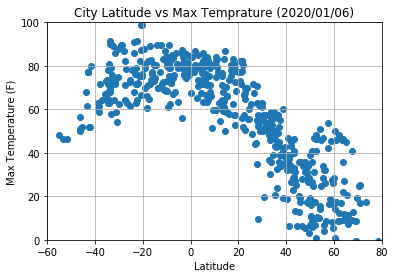

In [26]:
#convert (Unix time, UTC), to date format

dt=int(Date[0])
dt=datetime.datetime.utcfromtimestamp(Date[0]).strftime('%Y/%m/%d')


x_values = city_df['Lat']
y_values = city_df['Max_Temp']
plt.ylim(0,100)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temprature ({dt})')
plt.grid()
#plt.show()
plt.savefig("../output_data/LatitudeVsMaxTemprature.png")
print('Here we are ploting city temprature and latitudes.Analysing the plot tells us the temprature near the equater are higher as compared to the city higher latitudes. ')

#### Latitude vs. Humidity Plot

Here we are ploting the Humidity vs Latitudes.


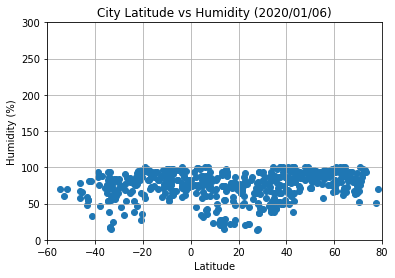

In [25]:
x_values = city_df['Lat']
y_values = city_df['Humidity']
plt.ylim(0,300)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({dt})')
plt.grid()
#plt.show()
plt.savefig("../output_data/LatitudeVsHumidity.png")
print('Here we are ploting the Humidity vs Latitudes.')

#### Latitude vs. Cloudiness Plot

Here er are ploting Latitude vs Cloudiness. Ananlysis sya that the Clodiness is not dependent on Latitude. 


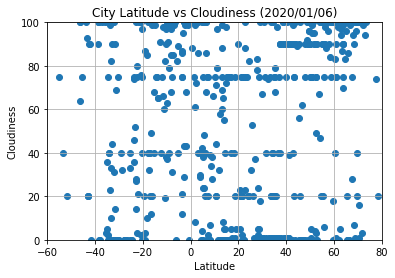

In [24]:
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.ylim(0,100)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs Cloudiness ({dt})')
plt.grid()
#plt.show()
plt.savefig("../output_data/LatitudeVsCloudiness.png")
print('Here er are ploting Latitude vs Cloudiness. Ananlysis sya that the Clodiness is not dependent on Latitude. ')

#### Latitude vs. Wind Speed Plot

Here we are ploting Latitude vs Wind Speed.Ananlysis say that Latitude has no affect on wind speed


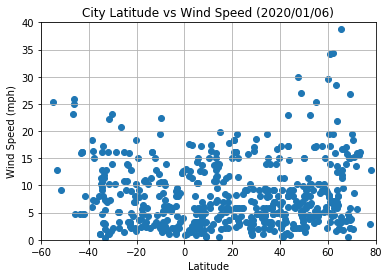

In [23]:
x_values = city_df['Lat']
y_values = city_df['Wind_Speed']
plt.ylim(0,40)
plt.xlim(-60,80)
plt.scatter(x_values,y_values)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs Wind Speed ({dt})')
plt.grid()
#plt.show()
plt.savefig("../output_data/LatitudeVsWindSpeed.png")
print('Here we are ploting Latitude vs Wind Speed.Ananlysis say that Latitude has no affect on wind speed')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def cal_regression(x_values, y_values):
    # Perform a linear regression on x and y 
    #(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #linregress

    # Get regression values
    regress_values = x_values * slope + intercept
    
    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    #print(line_eq)
    return regress_values

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_df=city_df[(city_df["Lat"]>0)]
north_df.head()

south_df=city_df[(city_df["Lat"]<0)]
south_df.head()

,cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Hobart,20,AU,1578277144,55,-42.88,147.33,77.00,16.11
2,Coquimbo,0,CL,1578277144,72,-29.95,-71.34,62.60,2.24
3,Chuy,0,UY,1578277143,85,-33.69,-53.46,69.55,11.83
6,Sao Joao do Piaui,97,BR,1578277144,82,-8.36,-42.25,72.25,1.81
9,Busselton,23,AU,1578276331,17,-33.64,115.35,90.00,11.43


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8755834300145094


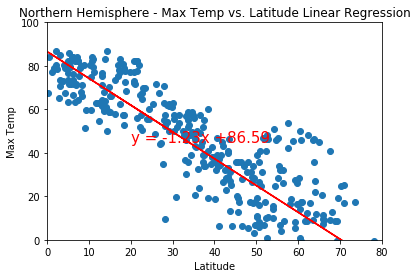

Negatively corelated


<Figure size 432x288 with 0 Axes>

In [15]:

plt.scatter(north_df["Lat"],north_df["Max_Temp"])
plt.ylim(0,100)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Max_Temp"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")
#call the regression function
#reg_North_temp_lat =cal_regression(north_df["Lat"],north_df["Max_Temp"])
plt.show()            
plt.savefig("../output_data/NorthHmsTemp_lat.png")            
            
print('Negatively corelated')        

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4561297383093546


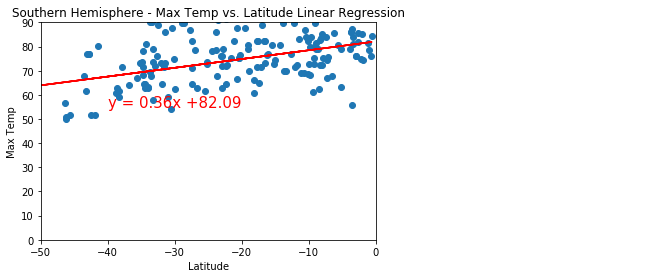

R vale is low


<Figure size 432x288 with 0 Axes>

In [16]:

plt.scatter(south_df["Lat"],south_df["Max_Temp"])
plt.ylim(0,90)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")   


#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Max_Temp"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")
#call the regression function
reg_south_temp_lat =cal_regression(south_df["Lat"],south_df["Max_Temp"])
plt.show()  
plt.savefig("../output_data/SouthHmsTemp_lat.png") 
print('R vale is low')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3778645535235319


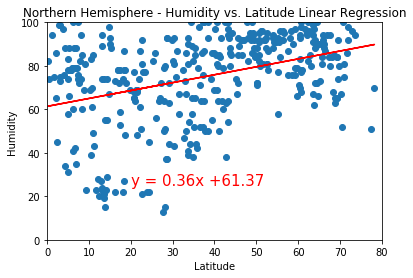

Positive but the r value is very low


<Figure size 432x288 with 0 Axes>

In [17]:

plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.ylim(0,100)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Humidity"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()            
plt.savefig("../output_data/NorthHmsHumidity_lat.png")            
print('Positive but the r value is very low')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33619866811247795


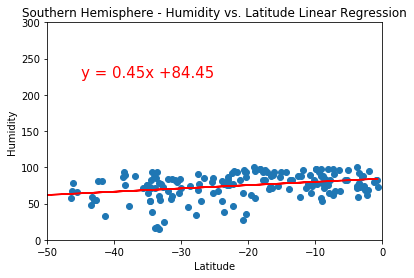

<Figure size 432x288 with 0 Axes>

In [18]:
#print(south_df["Humidity"].max())
#print(south_df["Humidity"].min())
#print(south_df["Lat"].max())
#print(south_df["Lat"].min())
#print(north_df["Humidity"].count())
#print(city_df["Humidity"].count())



plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.ylim(0,300)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Humidity"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-45,225),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()            
plt.savefig("../output_data/SouthHmsHumidity_lat.png")                  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2712995521829663


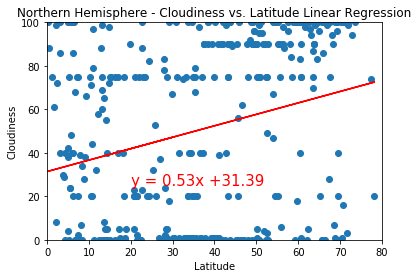

Positive coorelation but thevalue is very low


<Figure size 432x288 with 0 Axes>

In [19]:

plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.ylim(0,100)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Cloudiness"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show() 
plt.savefig("../output_data/NorthHmsCloudiness_lat.png")     
print('Positive coorelation but thevalue is very low')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22491616202111797


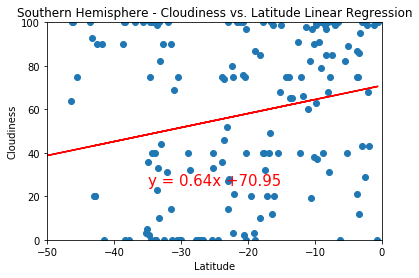

Not a good regression value


<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.ylim(0,100)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Cloudiness"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-35,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()   
plt.savefig("../output_data/SouthHmsCloudiness_lat.png")   
print('Not a good regression value')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16910104873057266


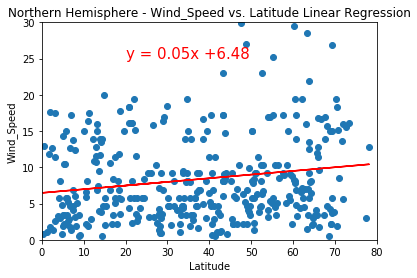

Not a good regression value


<Figure size 432x288 with 0 Axes>

In [21]:

#print(north_df.columns)
plt.scatter(north_df["Lat"],north_df["Wind_Speed"])
plt.ylim(0,30)
plt.xlim(0,80)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"],north_df["Wind_Speed"])
#linregress

# Get regression values
regress_values =north_df["Lat"] * slope + intercept
    
plt.plot(north_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show() 
plt.savefig("../output_data/NorthHmsWindSpeed_lat.png")   
print('Not a good regression value')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3368777295490659


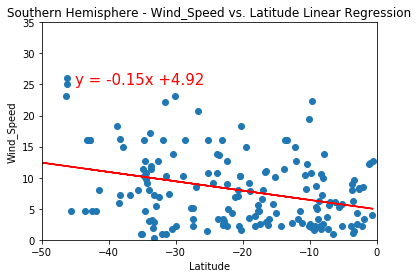

Negative regression


<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(south_df["Lat"],south_df["Wind_Speed"])
plt.ylim(0,35)
plt.xlim(-50,0)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression")   

#liner regression    
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Lat"],south_df["Wind_Speed"])
#linregress

# Get regression values
regress_values =south_df["Lat"] * slope + intercept
    
plt.plot(south_df["Lat"],regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")
#print(line_eq)
print(f"The r-squared is: {rvalue}")

plt.show()   
plt.savefig("../output_data/SouthHmsWindSpeed_lat.png") 
print('Negative regression')